In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('housePrice.csv')
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


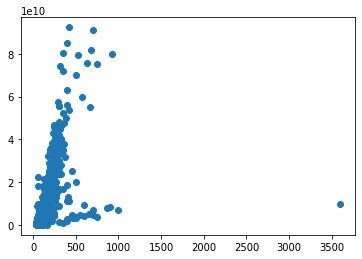

In [24]:
plt.scatter(df.Area, df.Price)

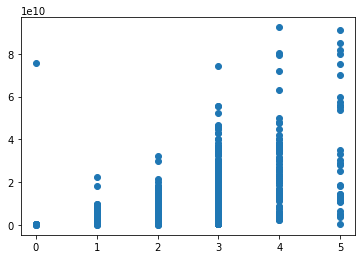

In [25]:
plt.scatter(df.Room, df.Price)

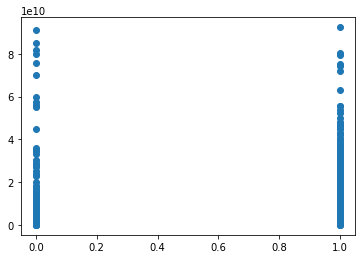

In [29]:
plt.scatter(df.Warehouse, df.Price)

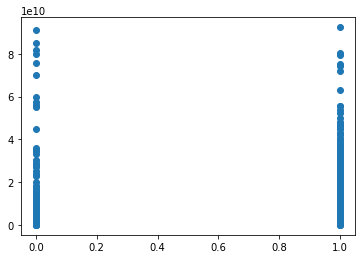

In [33]:
plt.scatter(df.Elevator, df.Price)

## Easy way :D

0.5726618705035971

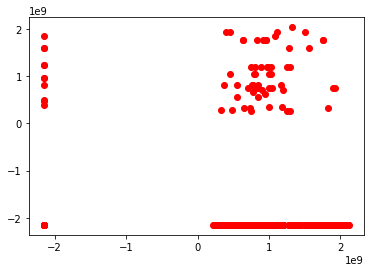

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# X = df.drop(columns=['Price', 'Price(USD)', 'Parking', 'Warehouse', 'Elevator', 'Address'])

X = df[['Area', 'Room']]
# X = df[['Area']]
# X = df[['Room']]
# all the same :/

y = np.int32(df['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

result = model.predict(X_test)

plt.plot(y_test, result, 'or')
accuracy_score(y_test, result)


In [69]:
df.replace(to_replace=['True'], value='1')


df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


## linear_model

In [72]:
cdf = df[['Area', 'Price']]

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [73]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[78465551.12351796]]
Intercept:  [-3.04420424e+09]


Text(0, 0.5, 'Price')

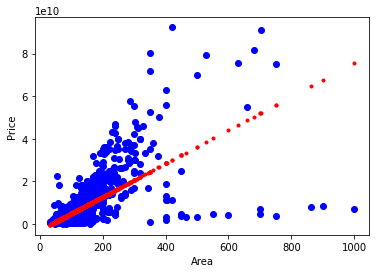

In [82]:
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '.r')
plt.scatter(train.Area, train.Price,  color='blue')

plt.xlabel("Area")
plt.ylabel("Price")

Mean absolute error: 3064124181.77
Residual sum of squares (MSE): 133897731488122535936.00
R2-score: -0.87


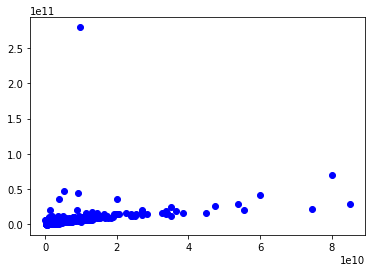

In [94]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])
predicted = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predicted - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predicted))
plt.scatter(test_y, predicted,  color='blue')

## Multiple Linear Regression

In [96]:

model = linear_model.LinearRegression()


In [99]:
cdf = df[['Area', 'Room', 'Price']]

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


train_x = np.asanyarray(train[['Area', 'Room']])
train_y = np.asanyarray(train[['Price']])
model.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[2.59161341e+07 4.35919598e+09]]
Intercept:  [-6.45005928e+09]


In [100]:

print('Variance score: %.2f' % model.score(X, y))

Variance score: -26.18
